# Particle Swarm Optimization: basics

Particle swarm optimization (PSO), first proposed by Eberhart and Kennedy (1995), is a population-based algorithm which intends for simulating the social behavior of a bird flock (swarm of particles) to reach the optimum region of the search space.

PSO is quite recent in the framework of geophysical data inversion (Shaw and Srivastava, 2007; Yuan et al., 2009) and is not yet widely used like well-known global optimization methods such as Monte-Carlo (Metropolis and Ulam, 1949; Mosegaard and Tarantola, 1995; Mosegaard and Sambridge, 2002; Socco and Boiero, 2008), simulated-annealing (Ryden and Park, 2006) or neighbourhood algorithm (Sambridge, 1999a,b, 2001). However, it was successfully applied to surface-wave analysis (Song et al., 2012; Wilken and Rabbel, 2012), traveltime tomography (Tronicke et al., 2012; Luu et al., 2016), seismic refraction (Poormirzaee et al., 2014) and seismic wave impedance inversion in igneous rock (Yang et al., 2017).

Banks et al. (2007, 2008); Zhang et al. (2015)

## Method

In PSO, individuals ($i$), or particles, are characterized by a velocity vector $V_{i} = [v^{1}_{i},..., v^{d}_{i},..., v^{D}_{i}] \in R^{D}$ and a position vector $X_{i} = [x^{1}_{i},..., x^{d}_{i},..., x^{D}_{i}] \in R^{D}$ in D-dimensional solution space. All particles are
initialized with random values at the beginning of the inversion process and the corresponding velocity
vectors are set to zero.

![png](velocity_vector.png)

The standard PSO update formulas are (Eberhart and Kennedy, 1995):

$\begin{equation}
V^{k}_{i} = V^{k}_{i} + c_{p}r_{p}(Xp_{i}-X^{k-1}_{i})+c_{g}r_{g}(Xg-X^{k-1}_{i})
\end{equation}$

$\begin{equation}
X^{k}_{i} = X^{k-1}_{i} + V^{k}_{i}
\end{equation}$

## A simple example

In [1]:
# Import matplotlib and numpy modules
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Import the Swarm class from NeSSI
from nessi.pso import Swarm

### 1-The peak function

The Peaks function in Equation 6 is a function of two
variables,  obtained  by  translating  and  scaling  Gaussian
distributions.  It  has  multiple  peaks  which  are  located
at  (0,1.58),  (0.46,0.63),  and  (1.28,0)  with  different  peak
function values (Aljarah & Ludwig, 2013). The function has the following definition:

![png](peak_equation.png)

In [2]:
def peaksF(X, Y):
    F = 3.*(1.-X)*(1.-X)\
                *np.exp(-1.*X**2-(Y+1.)**2)\
                -10.*(X/5.-X**3-Y**5)\
                *np.exp(-1.*X**2-Y**2)\
                -1./3.*np.exp(-1.*(X+1)**2-Y**2)

    return F

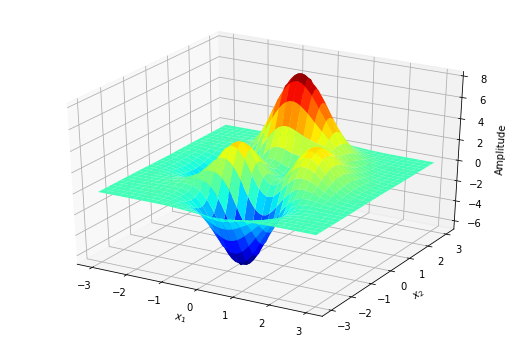

In [3]:
# Initialize 3D plot
fig = plt.figure(figsize=(9,6))
ax = fig.gca(projection='3d')
ax.set_xlabel(r'$x_{1}$')
ax.set_ylabel(r'$x_{2}$')
ax.set_zlabel(r'Amplitude')

# Calculate peak function
X, Y = np.meshgrid(np.linspace(-3, 3, 61), np.linspace(-3, 3, 61))
F = peaksF(X, Y)

# Plot
ax.plot_surface(X, Y, F, vmin=-6.0, vmax=8.0, cmap='jet');

### 2-Define the search-space

The search-space is delimited by the minimum and maximum values of each parameter (x1 and x2 in this case). An increment value (dx) is added to control the maximum displacement of the swarm's particles.

| x1 min | x1 max | dx1 | x2 min | x2 max | dx2 |
| ------ | ------ | --- | ------ | ------ | --- |
| -3.0   | 3.0    | 0.3 | -3.0   | 3.0    | 0.3 |

### 3-Process

In [4]:
# Initialize the swarm object
swarm = Swarm()

# PSO parameters
fmod = 'pspace_peaks.ascii'
ngen = 100
nindv = 20
fit = np.zeros((ngen+1, 2), dtype=np.float32)

# Get the search-space
swarm.init_pspace(fmod)

# Initialize particles
swarm.init_particles(nindv)

In [5]:
# First evaluation
swarm.misfit[:] = peaksF(swarm.current[:, 0, 0], swarm.current[:, 0, 1])
fit[0, 0] = np.amin(swarm.misfit)
fit[0, 1] = np.mean(swarm.misfit)

In [6]:
# Loop over generations
for igen in range(0, ngen):
    # Update
    swarm.update(control=1)
    # Evaluation
    for indv in range(0, nindv):
        vfit = peaksF(swarm.current[indv, 0, 0], swarm.current[indv, 0, 1])
        if vfit < swarm.misfit[indv]:
            swarm.history[indv, :, :] = swarm.current[indv, :, :]
            swarm.misfit[indv] = vfit
    # Store the misfit values
    fit[igen+1, 0] = np.amin(swarm.misfit)
    fit[igen+1, 1] = np.mean(swarm.misfit)

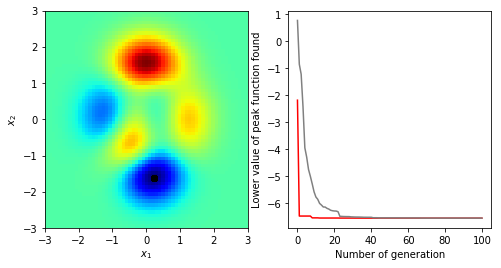

In [7]:
fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_xlim(-3.0, 3.0)
ax1.set_ylim(-3.0, 3.0)
ax1.set_xlabel(r'$x_{1}$')
ax1.set_ylabel(r'$x_{2}$')
ax1.imshow(F, aspect='auto', cmap='jet', extent=[-3.0, 3.0, -3.0, 3.0], origin='upper-left')
ax1.scatter(swarm.history[:, 0, 0], swarm.history[:, 0, 1], color='black')
ax2 = fig.add_subplot(1, 2, 2)
ax2.set_xlabel('Number of generation')
ax2.set_ylabel('Lower value of peak function found')
ax2.plot(fit[:, 0], color='red')
ax2.plot(fit[:, 1], color='gray');

## References

Aljarah, I. & Ludwig, S. (2013). A MapReduce based Glowworm Swarm Optimization Approach for Multimodal Functions. *10.1109/SIS.2013.6615155*.

Eberhart, R. C., & Kennedy, J. (1995). Particle swarm optimization. In *IEEE International Conference on Neural Networks, Perth, Australia.*

Shi, Y., & Eberhart, R. (1998, May). A modified particle swarm optimizer. In *Evolutionary Computation Proceedings, 1998. IEEE World Congress on Computational Intelligence., The 1998 IEEE International Conference on (pp. 69-73). IEEE.*